# 線形回帰（単一パラメータ）に対するラプラス近似

「Juliaで作って学ぶベイズ統計学」P.172 参照

In [1]:
using Distributions
using Plots
using ForwardDiff
using LinearAlgebra

## 観測データ

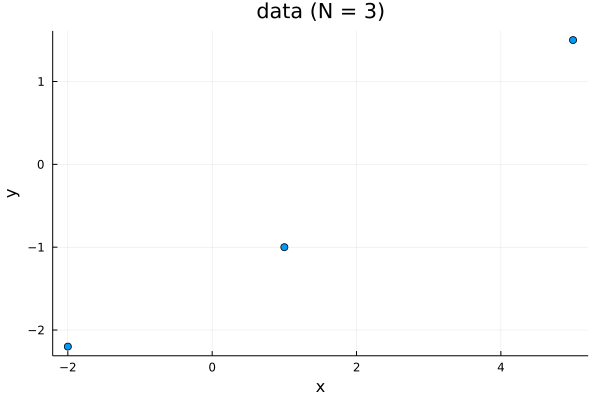

In [2]:
X_obs = [
    -2.0
    1.0
    5.0
]

Y_obs = [
    -2.2
    -1.0
    1.5
]

scatter(X_obs, Y_obs, xlab="x", ylab="y", label=:none, title="data (N = $(length(X_obs)))")

In [3]:
# 切片はゼロで固定
w₂ = 0

# yに付加されるノイズの標準偏差
σ = 1.0

# 事前分布のパラメータ
μ₁ = 0.0
σ₁ = 10.0;

In [8]:
# 非正規化対数事後分布
ulp(w₁) = 
    sum(logpdf.(Normal.(w₁ * X_obs .+ w₂, σ), Y_obs)) +
    logpdf(Normal(μ₁, σ₁), w₁)

# 分布を表示する範囲
w₁s = range(-5, 5, length=100);

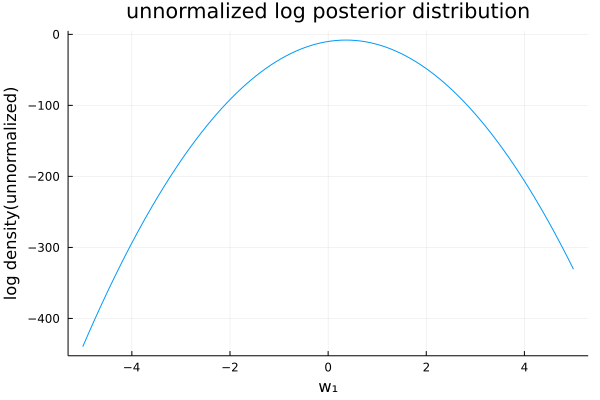

In [10]:
# 非正規化対数事後分布の可視化
plot(w₁s, ulp.(w₁s), xlab="w₁", ylab="log density(unnormalized)",
     title="unnormalized log posterior distribution", label=:none)

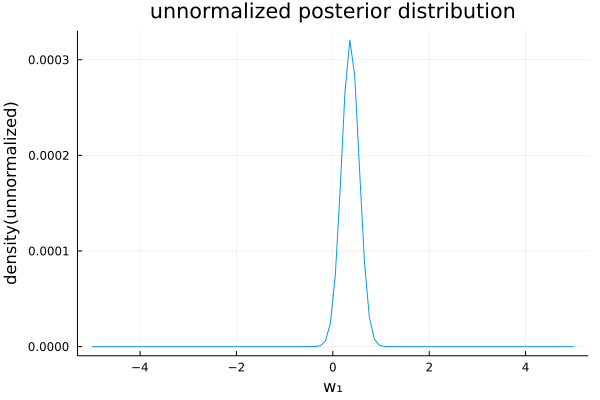

In [11]:
# 非正規化事後分布の可視化
plot(w₁s, exp.(ulp.(w₁s)), xlab="w₁", ylab="density(unnormalized)",
     title="unnormalized posterior distribution", label=:none)

In [ ]:
# 勾配法（1dim）
function gradient_method_1dim(f, x_init, η, maxiter)
    fʼ(x) = ForwardDiff.derivative(f, x)
    x_seq = Array{typeof(x_init), 1}(undef, maxiter)
    x_seq[1] = x_init
    
end